In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create the dataset
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)


df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
# Sample data table (you should replace this with your own data)
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})
# Convert categorical data to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)
# Split data into features and target variable
X = data.drop('buys_computer_yes', axis=1)
y = data['buys_computer_yes']
# Calculate Information Gain for each feature
information_gain = mutual_info_classif(X, y)
# Find the feature with the highest Information Gain
root_node_feature_index = np.argmax(information_gain)
root_node_feature_name = X.columns[root_node_feature_index]
print(f"The root node feature selected is: {root_node_feature_name}")

The root node feature selected is: student_yes


In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["young", "high", "no", "fair", "no"],
    ["young", "high", "no", "excellent", "no"],
    ["middle-aged", "high", "no", "fair", "yes"],
    ["senior", "medium", "no", "fair", "yes"],
    ["senior", "low", "yes", "fair", "yes"],
    ["senior", "low", "yes", "excellent", "no"],
    ["middle-aged", "low", "yes", "excellent", "yes"],
    ["young", "medium", "no", "fair", "no"],
    ["young", "low", "yes", "fair", "yes"],
    ["senior", "medium", "yes", "fair", "yes"],
    ["young", "medium", "yes", "excellent", "yes"],
    ["middle-aged", "medium", "no", "excellent", "yes"],
    ["middle-aged", "high", "yes", "fair", "yes"],
    ["senior", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

tree_depth = pipeline.named_steps["classifier"].get_depth()

print(f"Tree depth: {tree_depth}")

Tree depth: 4


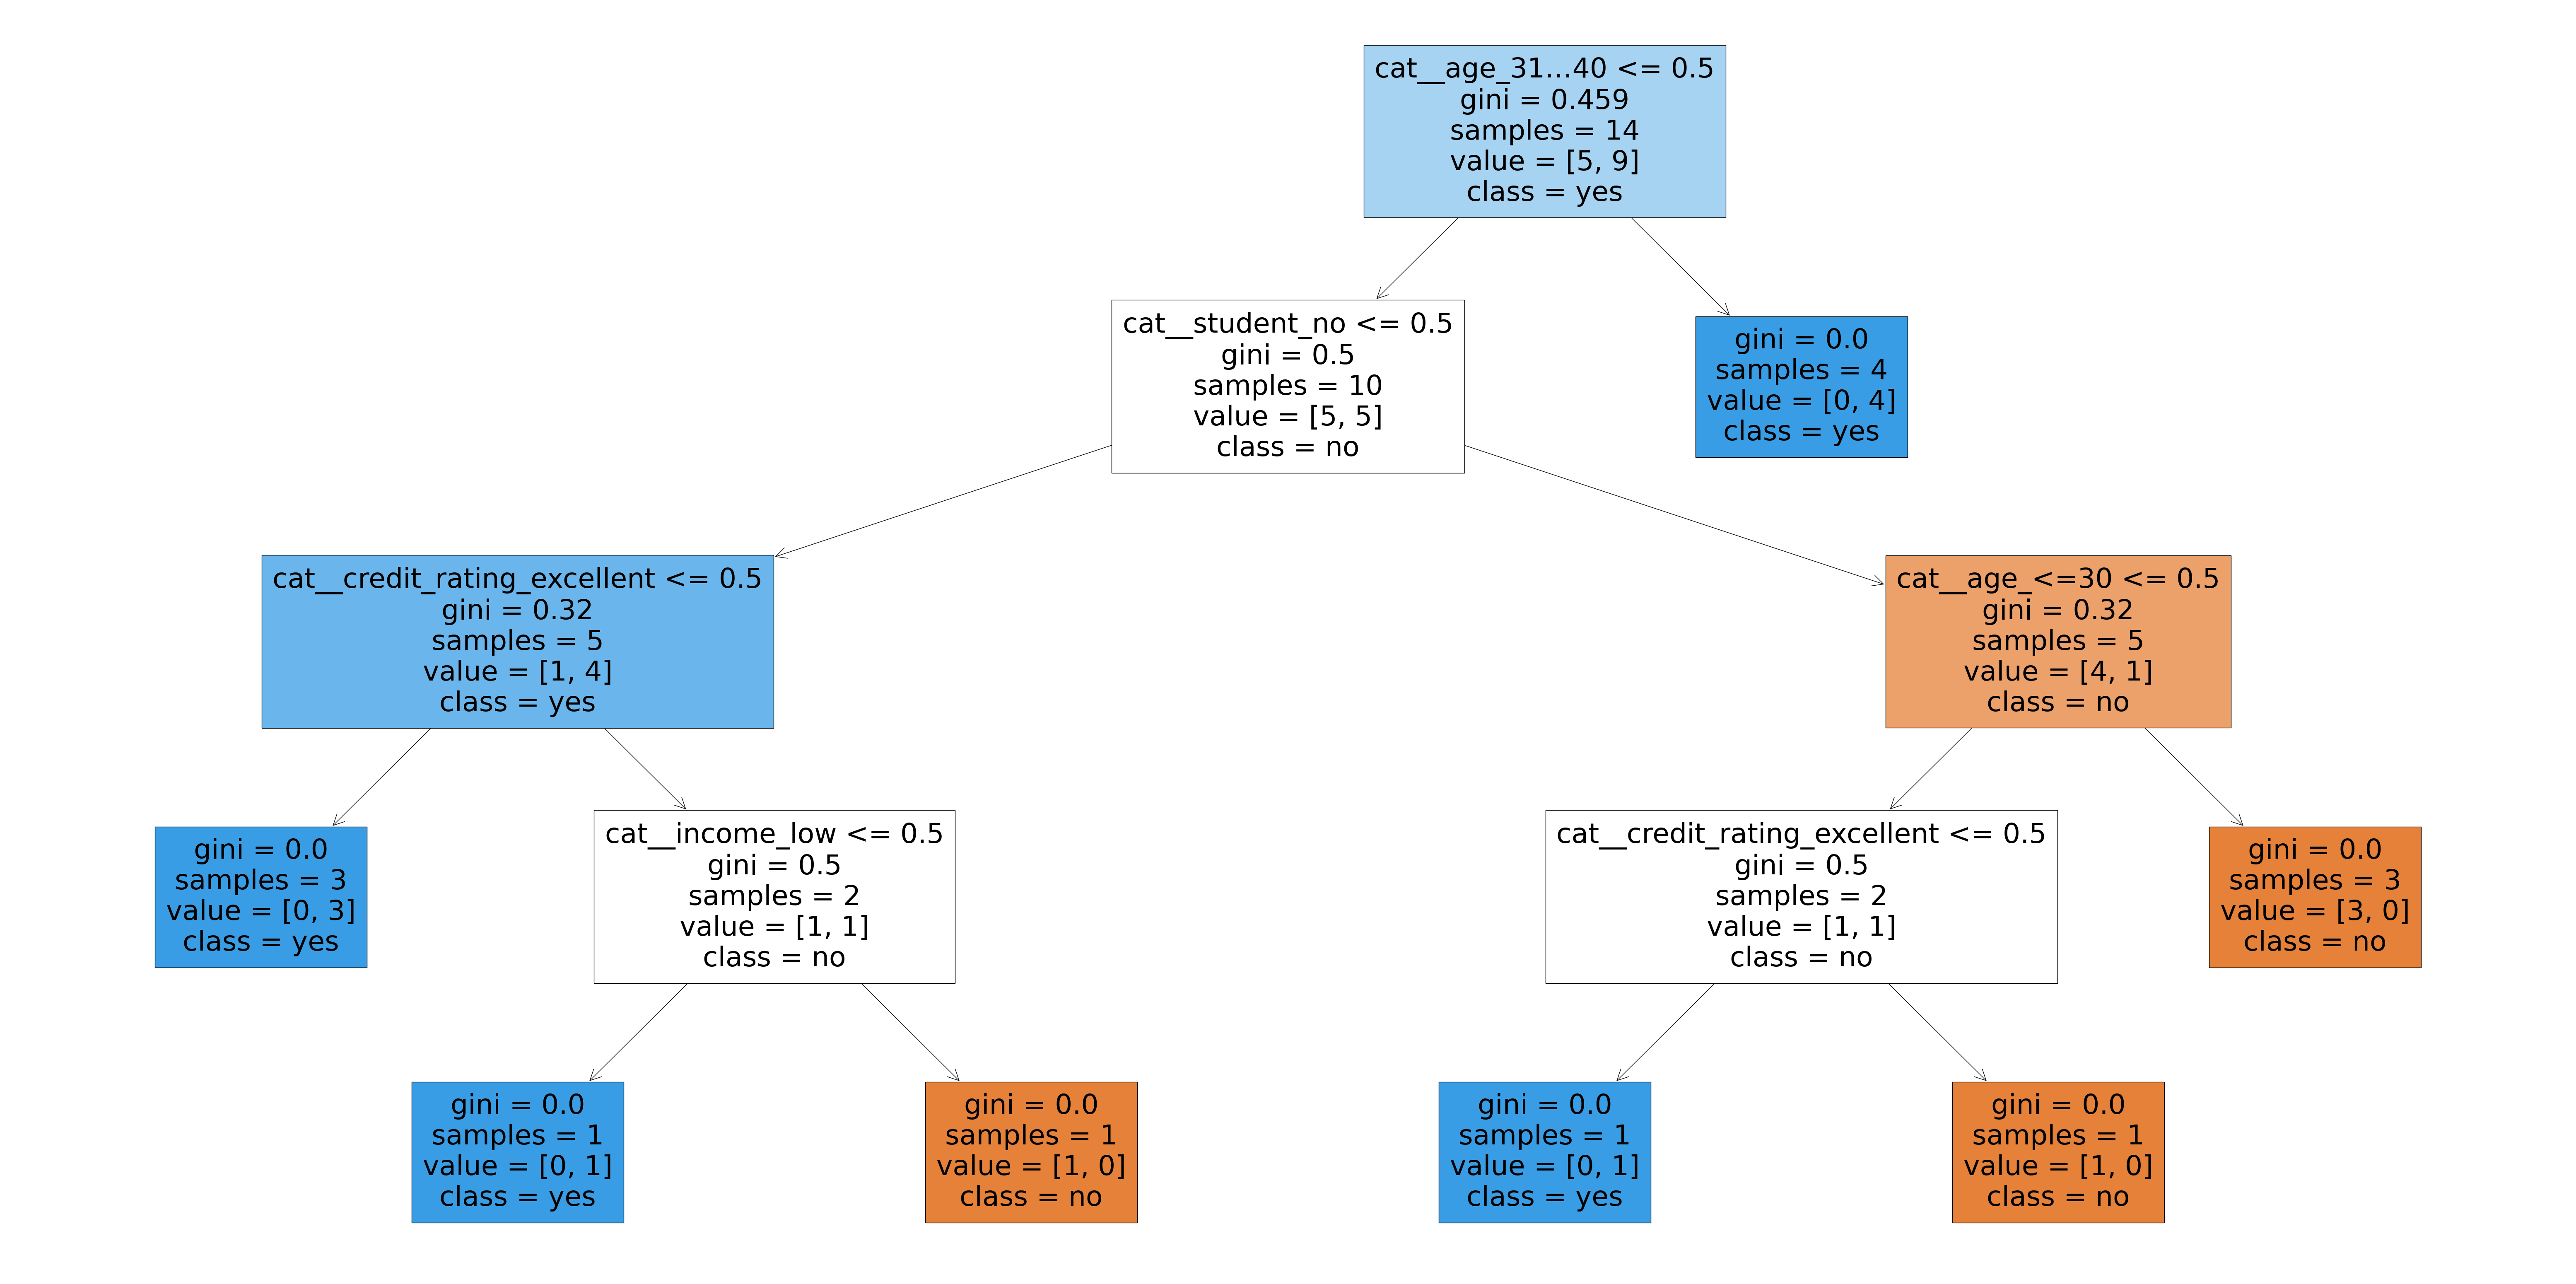

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31…40", "high", "no", "fair", "yes"],
    [">40", "medium", "no", "fair", "yes"],
    [">40", "low", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31…40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31…40", "medium", "no", "excellent", "yes"],
    ["31…40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

columns = ["age", "income", "student", "credit_rating", "buys_computer"]

df = pd.DataFrame(data, columns=columns)

X = df.drop("buys_computer", axis=1)
y = df["buys_computer"]

categorical_features = ["age", "income", "student", "credit_rating"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(), categorical_features)],
    remainder="passthrough"
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

pipeline.fit(X, y)

feature_names = list(pipeline.named_steps["preprocessor"].get_feature_names_out(input_features=categorical_features)) + list(X.columns.drop(categorical_features))

plt.figure(figsize=(80, 40))
plot_tree(pipeline.named_steps["classifier"], filled=True, feature_names=feature_names, class_names=['no', 'yes'])
plt.show()

In [53]:
# Calculate the entropy at the root node
class_counts = df['buys_computer'].value_counts()
class_probabilities = class_counts / len(df)
root_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))

# Calculate the entropy and information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
entropies = []
information_gains = []

for attribute in attributes:
    attribute_entropy = 0
    attribute_information_gain = 0

    # Split the dataset based on the unique values of the attribute
    attribute_values = df[attribute].unique()
    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_class_counts = subset['buys_computer'].value_counts()
        subset_class_probabilities = subset_class_counts / len(subset)
        subset_entropy = -np.sum(subset_class_probabilities * np.log2(subset_class_probabilities))
        attribute_entropy += (len(subset) / len(df)) * subset_entropy

    # Calculate the information gain for the attribute
    attribute_information_gain = root_entropy - attribute_entropy

    entropies.append(attribute_entropy)
    information_gains.append(attribute_information_gain)
# Find the attribute with the highest Information Gain (the root node)
root_node_index = np.argmax(information_gains)
root_node_attribute = attributes[root_node_index]
root_node_information_gain = information_gains[root_node_index]

print(f"The root node is '{root_node_attribute}' with Information Gain {root_node_information_gain:.3f}")

# Print the entropies and information gains
for i in range(len(attributes)):
    print(f"Entropy for {attributes[i]}: {entropies[i]}")
    print(f"Information Gain for {attributes[i]}: {information_gains[i]}")

The root node is 'age' with Information Gain 0.247
Entropy for age: 0.6935361388961918
Information Gain for age: 0.24674981977443933
Entropy for income: 0.9110633930116763
Information Gain for income: 0.02922256565895487
Entropy for student: 0.7884504573082896
Information Gain for student: 0.15183550136234159
Entropy for credit_rating: 0.8921589282623617
Information Gain for credit_rating: 0.04812703040826949


In [10]:
cd (fullfile(matlabroot,'extern','engines','python'))


[WinError 2] The system cannot find the file specified: "(fullfile(matlabroot,'extern','engines','python'))"
C:\Users\DELL


In [11]:
system('python setup.py install')


["''python' is not recognized as an internal or external command,",
 'operable program or batch file.']

In [12]:
!pip install matplotlib pandas scikit-learn


In [13]:
!pip install scikit-learn


In [14]:
!pip install scikit-learn


In [25]:
import numpy as np 
import pandas as pd 
training_data=pd.read_excel(r"C:\Users\DELL\Downloads\new training.xlsx")
testing_data=pd.read_excel(r"C:\Users\DELL\Downloads\new testing.xlsx")

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572


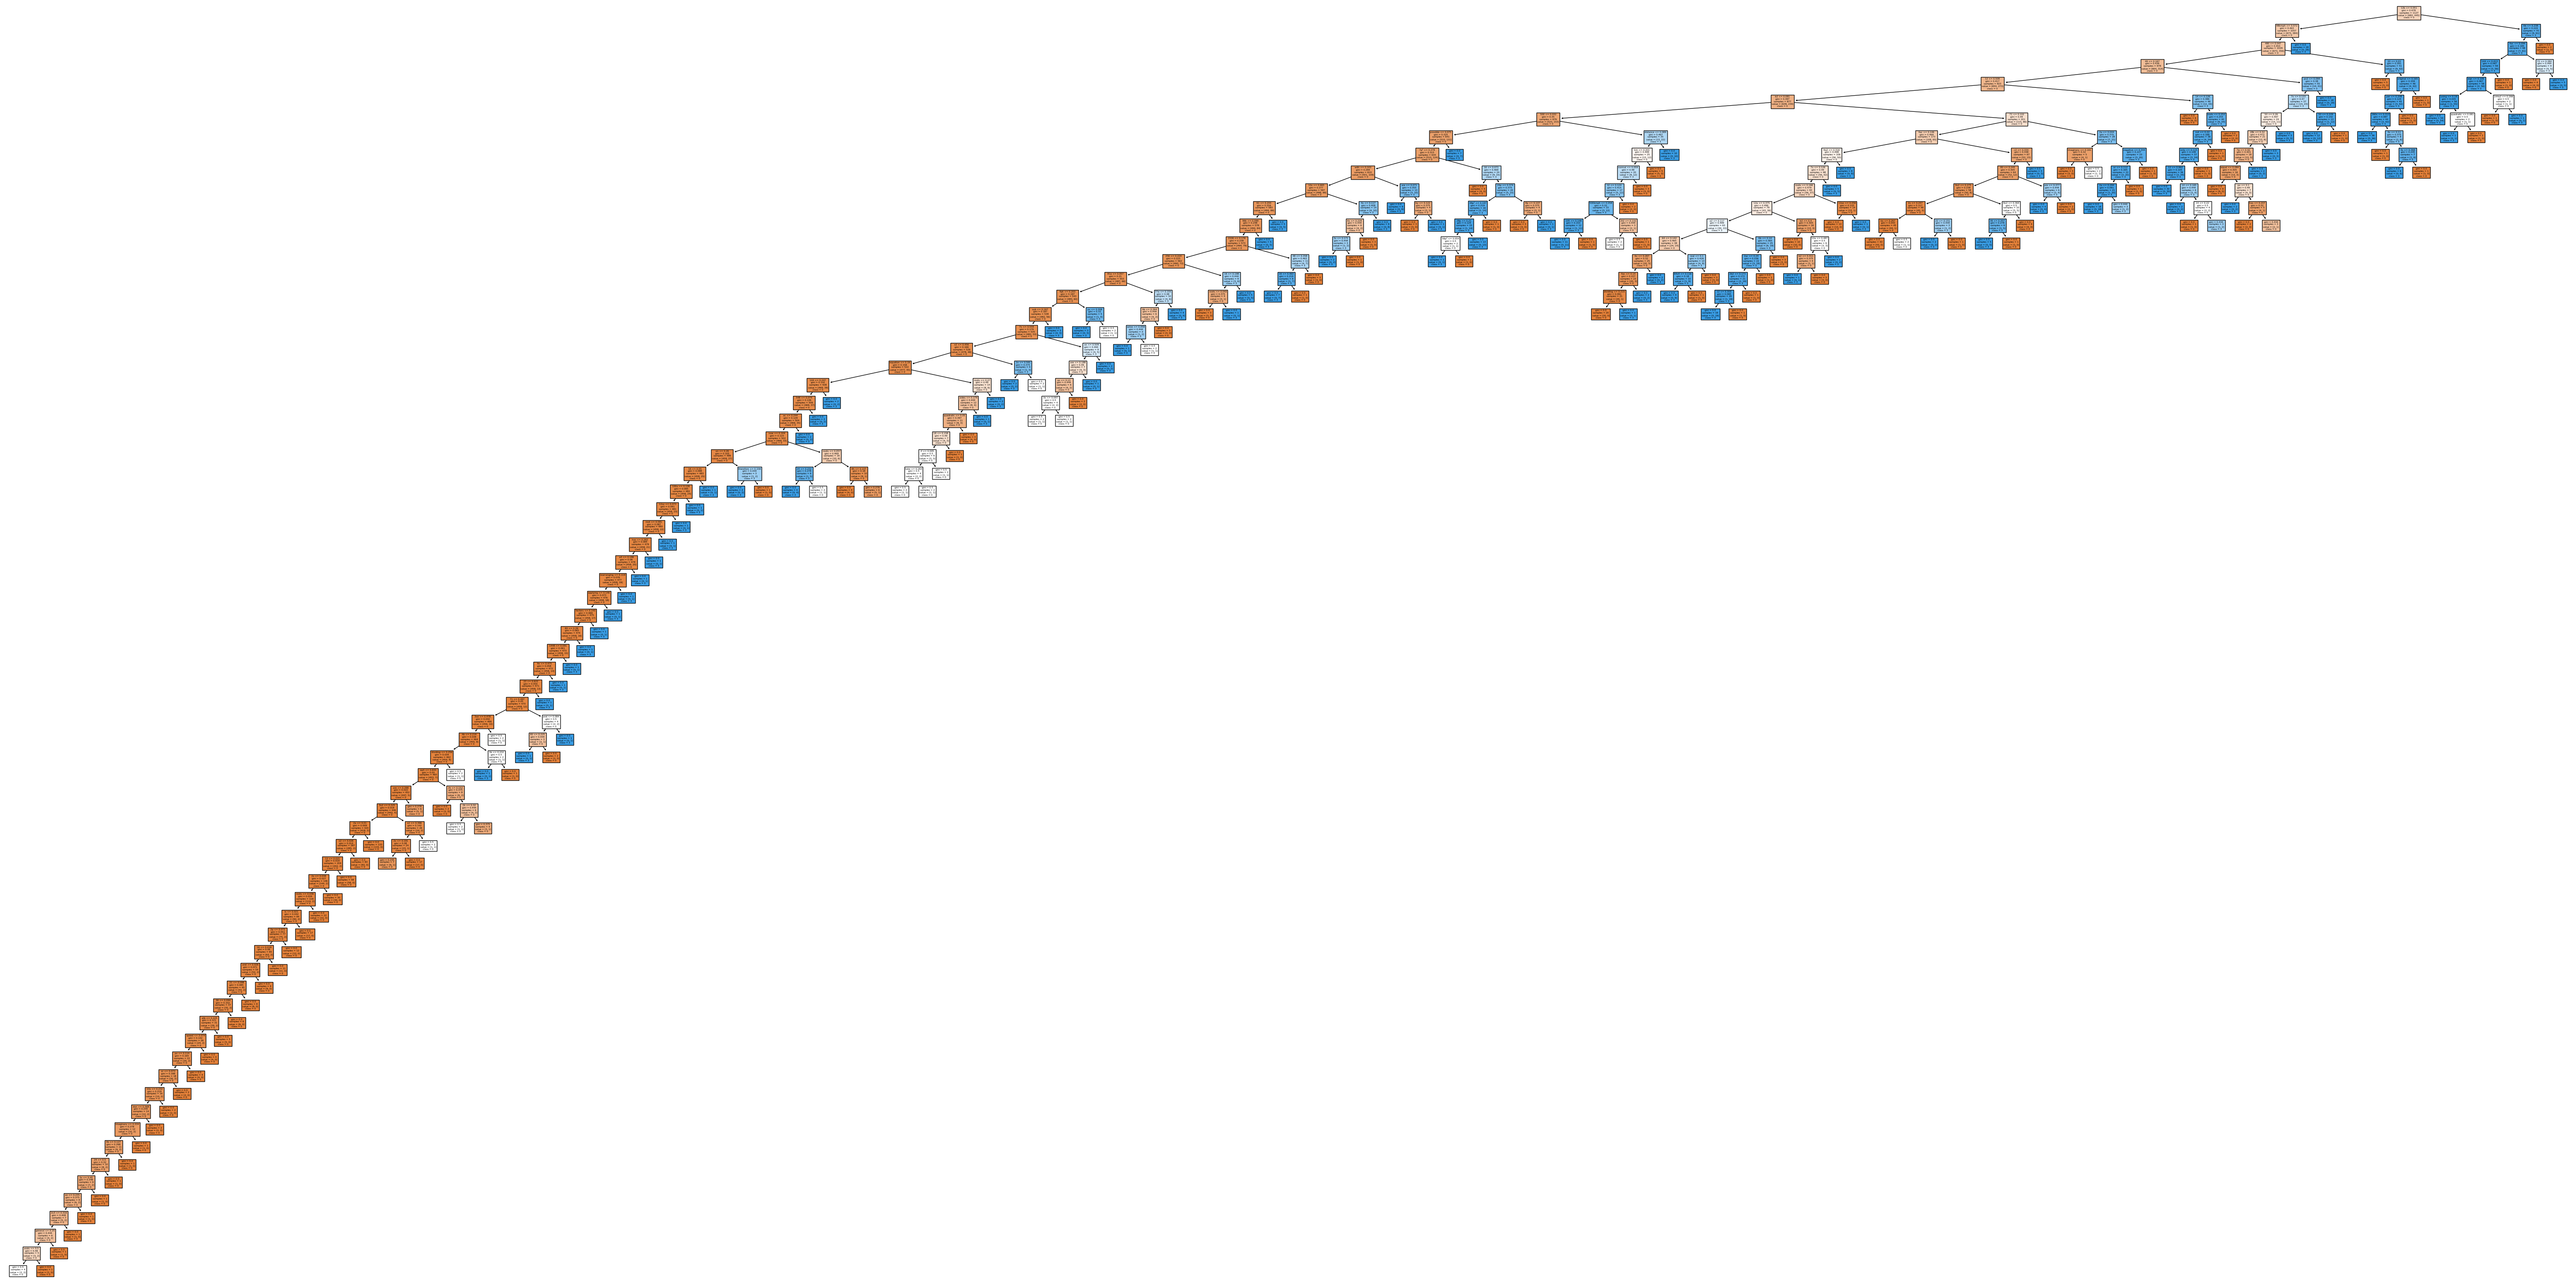

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fill missing values
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Split data into features and target
Tr_X = training_data['input']
Tr_y = training_data['Classification']

Te_X = testing_data['Equation']
Te_y = testing_data['Classification']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
Tr_X = tfidf_vectorizer.fit_transform(Tr_X)
Te_X = tfidf_vectorizer.transform(Te_X)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out().tolist()

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate accuracy on training and test data
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree
plt.figure(figsize=(80, 40))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "3"])
plt.show()



Training Set Accuracy (max_depth=3): 0.71
Test Set Accuracy (max_depth=3): 0.64


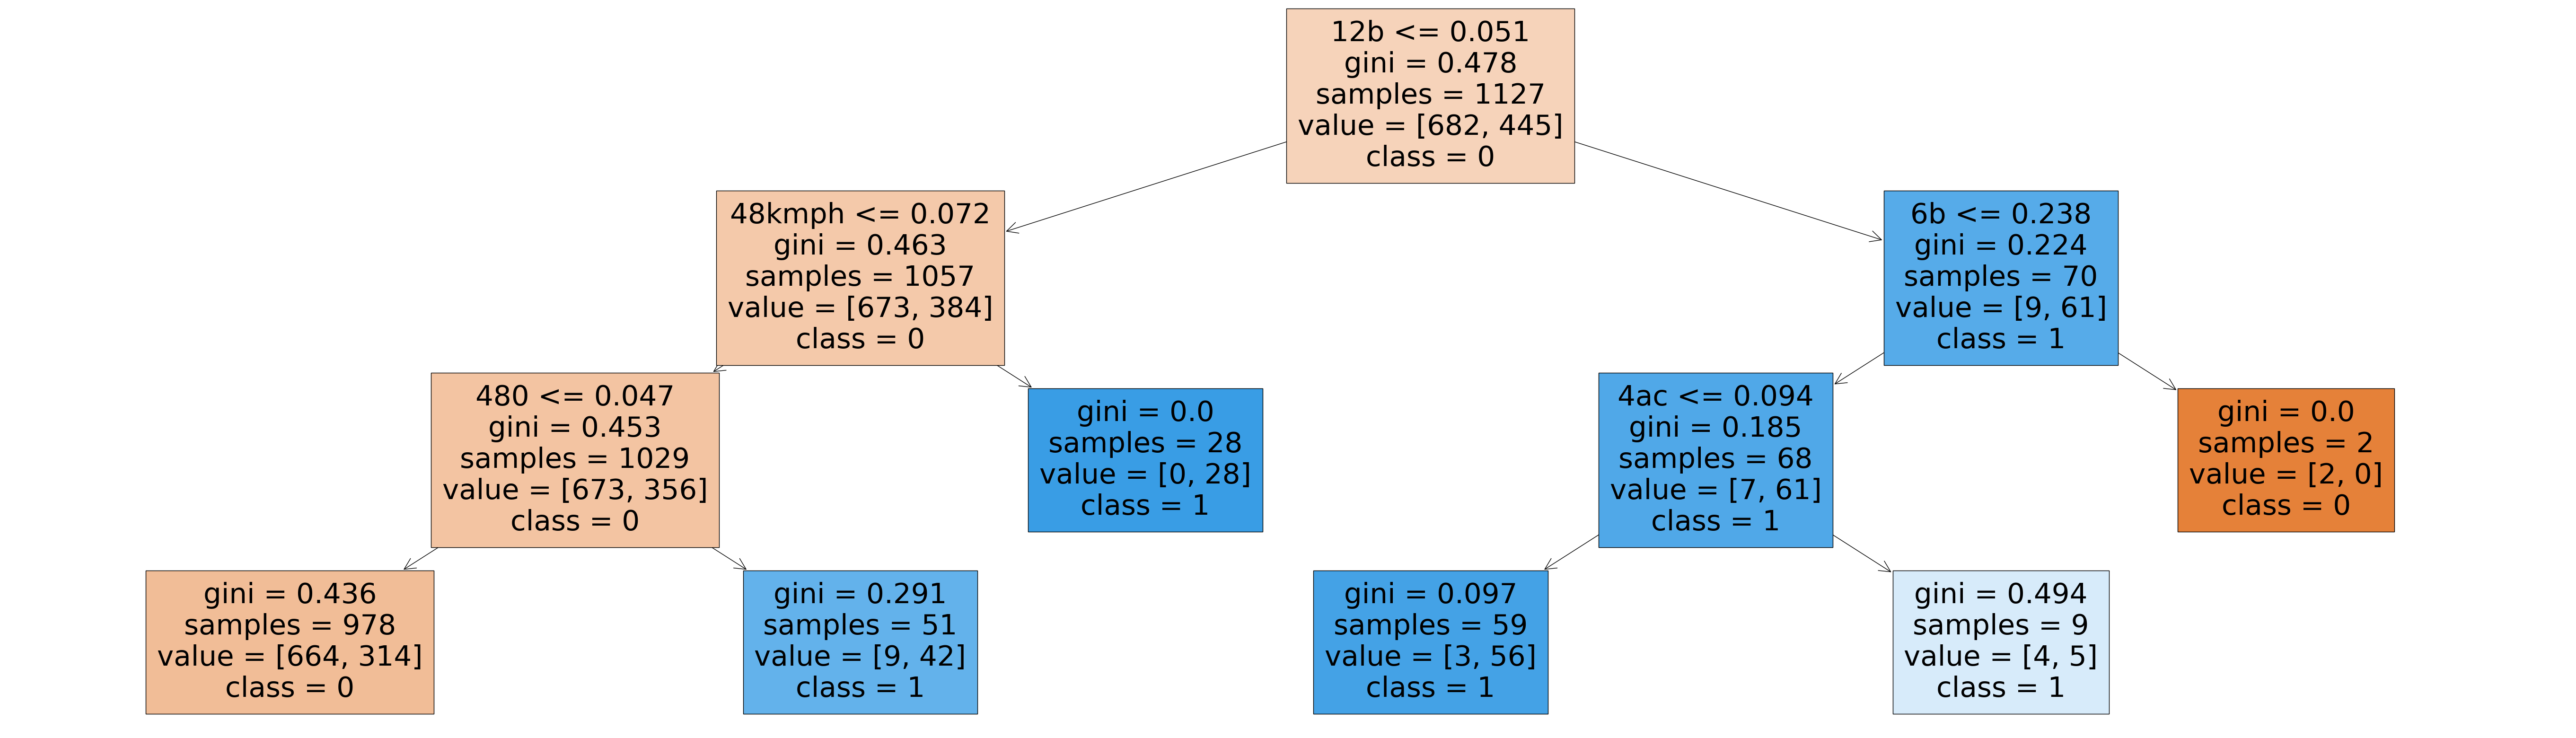

In [60]:
# Set the max_depth constraint
max_depth = 3 # Adjust the value as needed

# Create and train the Decision Tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy (max_depth={max_depth}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.show()




Training Set Accuracy with 'entropy' criterion: 0.7542147293700089
Test Set Accuracy with 'entropy' criterion: 0.6857142857142857


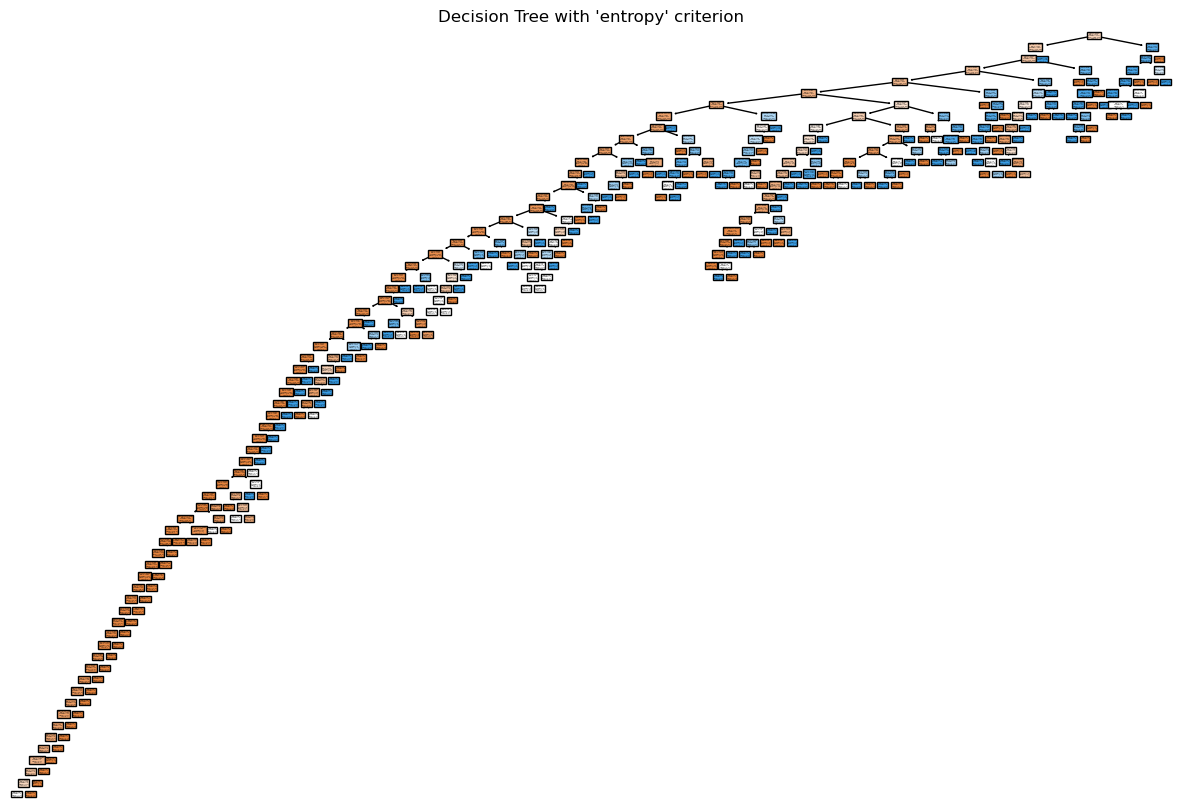

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

your_feature_names = vectorizer.get_feature_names_out()


model_entropy = DecisionTreeClassifier(max_depth=5, criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print("\nTraining Set Accuracy with 'entropy' criterion:", training_accuracy_entropy)
print("Test Set Accuracy with 'entropy' criterion:", test_accuracy_entropy)

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "3"])
plt.title("Decision Tree with 'entropy' criterion")
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(training_data['input'])
X_test = vectorizer.transform(testing_data['Equation'])

y = training_data['Classification']
y_test = testing_data['Classification']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=32)

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_val, y_pred_dt)
classification_report_dt = classification_report(y_val, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

random_forest = RandomForestClassifier(n_estimators=95, max_depth=3, random_state=32)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_val, y_pred_rf)
classification_report_rf = classification_report(y_val, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.679340937896071
Decision Tree Confusion Matrix:
 [[435  27]
 [226 101]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.94      0.77       462
           1       0.79      0.31      0.44       327

    accuracy                           0.68       789
   macro avg       0.72      0.63      0.61       789
weighted avg       0.71      0.68      0.64       789


Random Forest Accuracy: 0.6159695817490495
Random Forest Confusion Matrix:
 [[460   2]
 [301  26]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       462
           1       0.93      0.08      0.15       327

    accuracy                           0.62       789
   macro avg       0.77      0.54      0.45       789
weighted avg       0.74      0.62      0.50       789

